In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import datetime as dt
import collections
import seaborn as sns
import datetime
from collections import deque
import time
from tqdm import tqdm_notebook as tqdm
import random

import math
import copy
import csv

import scipy
import numpy as np
import statistics
import scipy.stats
from scipy.fft import fft, ifft

import os
import dill 
import joblib
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from collections import deque

from numpy.linalg import svd, matrix_rank
from sklearn.decomposition import FastICA
from numpy.lib.stride_tricks import as_strided


from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

from sklearn import preprocessing 

from hmmlearn.hmm import GaussianHMM
from trimine_HMM import TriMine
import plotly.express as px


def ZnormSequence(seq,MAXVAL=1):
    n_dims=seq.shape[1]
    print(f'ndims={n_dims}')
    normSeq = np.zeros(seq.shape)

    for i,seq_d in enumerate(seq.T):
        std = statistics.pstdev(seq_d)
        mean = statistics.mean(seq_d)
        normSeq[:,i]=[MAXVAL*(a-mean)/std for a in seq_d] 
    return normSeq


## h_1_ss

In [2]:
path = '../trimine_result_stream_update/HVFTV_h_1/result.dill'
result = dill.load(open(path,'rb'))

In [3]:
result

[[[0, 0]],
 [3.2344971379999947,
  2.694313901000001,
  3.2940397969999964,
  2.8480612339999993,
  2.453764456000002,
  1.6428581589999993,
  1.7749040429999923,
  2.2330018490000043,
  2.823730089999998,
  3.2789396490000087,
  3.0136464299999943,
  2.0389760509999917,
  1.8905757279999875,
  1.8951480739999909,
  2.3774631990000046,
  2.5157445499999938,
  2.617023556000021,
  1.911945387000003,
  2.406168531999981,
  2.6433393869999975,
  2.8887674959999856,
  2.490182166000011,
  2.5588782100000174,
  1.8060807920000173,
  1.9962739039999917,
  2.604292314999981,
  3.3004340739999805,
  3.574389771,
  2.7301514920000045,
  1.9055471300000022,
  1.8701497060000065,
  2.351971625999994,
  2.788419661000006,
  2.874264110000013,
  3.1470729010000014,
  2.16127877400001,
  2.500077582000017,
  2.2822183870000003,
  2.566780076000015,
  2.5678595550000125,
  2.43393519899999,
  1.7741105350000055,
  1.8836250539999924,
  2.3009408640000117,
  2.390472084999999,
  2.0008814279999854,
  

In [4]:
trimine= result[2]
C = result[2].C
path  = result[0]
plt.figure(figsize=(15,4))
plt.plot(C)
st=0
plt.axvspan(0, path[0][1],color=sns.color_palette()[0],alpha=0.3)
for i,p in enumerate(path):
    st=path[i][1]
    if i +1< len(path):
        ed = path[i+1][1]
    else:
        ed = C.shape[0]
    plt.axvspan(st, ed,color=sns.color_palette()[path[i][0]],alpha=0.3)

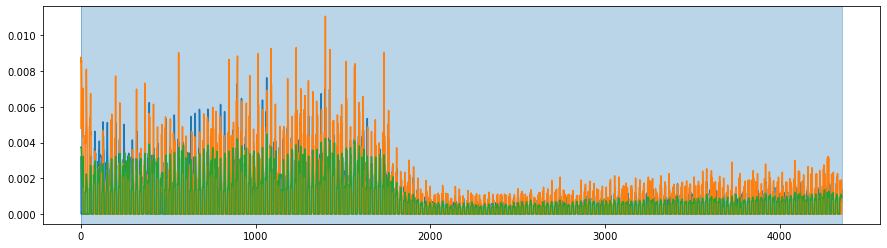

In [5]:
plt.figure(figsize=(15,4))
plt.plot(C)
st=0
plt.axvspan(0, path[0][1],color=sns.color_palette()[0],alpha=0.3)
for i,p in enumerate(path):
    st=path[i][1]
    if i +1< len(path):
        ed = path[i+1][1]
    else:
        ed = C.shape[0]
    plt.axvspan(st, ed,color=sns.color_palette()[path[i][0]],alpha=0.3)

In [6]:
trimine.regimes[0].A

array([[7.19641056e-08, 1.23072381e-07, 3.55994286e-05],
       [7.19641056e-08, 2.70993180e-06, 2.01370385e-06],
       [8.34768524e-03, 9.65485729e-03, 1.50777370e-03],
       [3.33855486e-04, 2.14544976e-04, 4.22614770e-03],
       [1.60913268e-04, 4.28966879e-04, 2.37490088e-04],
       [4.51335185e-04, 4.90189218e-04, 4.57961085e-04],
       [5.84918280e-03, 7.12203449e-03, 9.73704457e-03],
       [2.30973128e-05, 2.25425207e-05, 2.67874878e-05],
       [9.39741486e-04, 1.26969619e-03, 7.14667661e-04],
       [3.14109927e-03, 3.86374133e-03, 3.31165012e-03],
       [1.70193095e-03, 1.88048244e-03, 1.04484889e-03],
       [5.36857322e-05, 1.59933499e-04, 1.01312674e-04],
       [1.40176107e-03, 1.07683145e-03, 4.54110402e-03],
       [5.62430750e-03, 6.28331718e-03, 5.07395989e-03],
       [6.08310919e-04, 1.07579389e-05, 5.97196023e-04],
       [1.95168035e-03, 2.45821438e-03, 1.74546091e-03],
       [3.60933739e-03, 5.18648878e-03, 1.02982649e-02],
       [2.22516345e-02, 2.75898

In [20]:
plt.figure(figsize=(15,4))
A = trimine.regimes[0].A
A  = [a/a.sum() for a in A]
df = pd.DataFrame(A)
px.scatter_ternary(df, a=0, b=1, c=2)

<Figure size 1080x288 with 0 Axes>

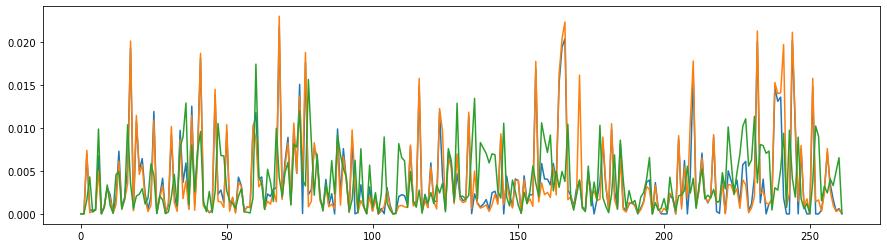

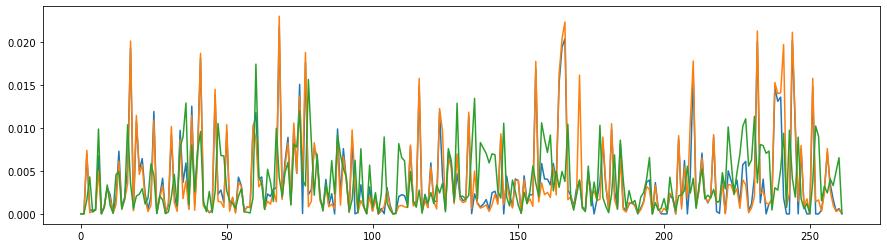

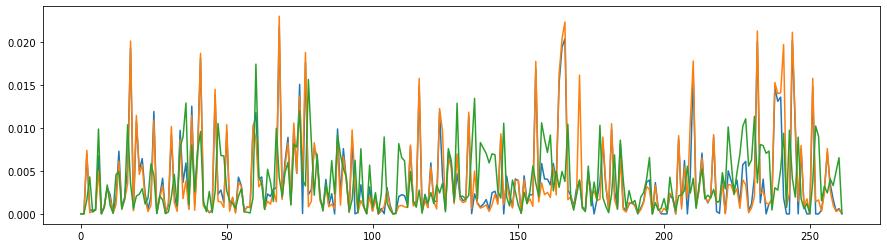

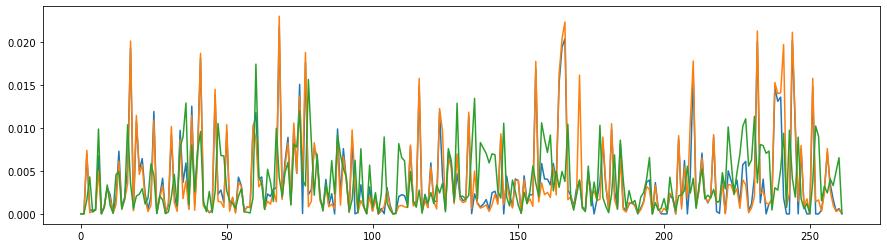

In [50]:
for i in trimine.regimes:
#     A_nom = np.zeros(i.A.shape)
#     for j,sub in enumerate(i.A):
#         A_nom[j,:] = sub / sub.sum()
    A_nom=i.A
    plt.figure(figsize=(15,4))
    plt.plot(A_nom)
    

In [21]:
plt.figure(figsize=(15,4))
O = trimine.regimes[0].O
O = [o/o.sum() for o in O]
df = pd.DataFrame(O)
px.scatter_ternary(df, a=0, b=1, c=2)

<Figure size 1080x288 with 0 Axes>

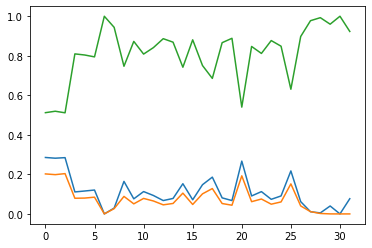

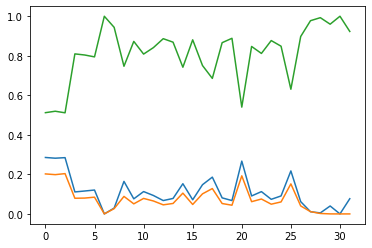

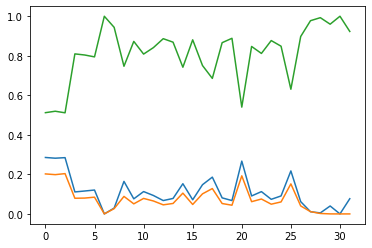

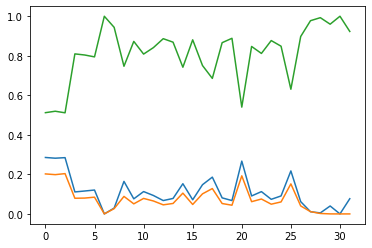

In [55]:
for i in trimine.regimes:
    O_nom = i.O
    plt.figure()
    plt.plot(O_nom)

# HVFTV_h_1_pudo_full

In [165]:
path = '../trimine_result_stream_update/HVFTV_h_1_pudo_full/result.dill'
result = dill.load(open(path,'rb'))

In [166]:
result

[[[0, 0], [1, 1811], [1, 3971], [2, 4351]],
 [3.440239374000001,
  2.9121740920000008,
  3.4809096130000086,
  3.023553316999994,
  2.608375234999997,
  1.7732976650000012,
  1.913677339000003,
  2.3825044520000063,
  2.9824192720000013,
  3.447723234999984,
  3.178823776999991,
  2.1836345549999976,
  2.034852314999995,
  2.036507513999993,
  2.5261270980000177,
  2.6703215,
  2.772336344999985,
  2.0452729380000108,
  2.561605653999976,
  2.805937226999987,
  3.058622001999993,
  2.644208285000019,
  2.7046529120000002,
  1.9392648189999875,
  2.138349532999996,
  2.7454381279999893,
  3.464703904000004,
  3.7534634380000114,
  2.877894839999982,
  2.0419089830000132,
  2.0076188730000126,
  2.4928608639999936,
  2.950426140000019,
  3.024439782999991,
  3.3088206689999993,
  2.3075623440000186,
  2.655348169000007,
  2.434155110000006,
  2.7117662240000016,
  2.70518960199999,
  2.5718470930000024,
  1.9070206239999834,
  2.0199506620000136,
  2.4429375340000092,
  2.534026847000007

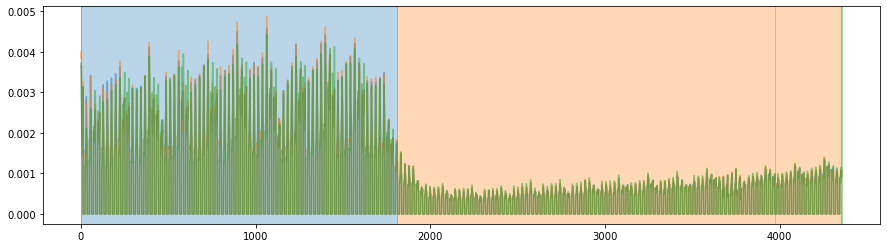

In [167]:
trimine= result[2]
C = result[2].C
path  = result[0]
plt.figure(figsize=(15,4))
plt.plot(C,alpha=0.5)
st=0
plt.axvspan(0, path[0][1],color=sns.color_palette()[0],alpha=0.3)
for i,p in enumerate(path):
    st=path[i][1]
    if i +1< len(path):
        ed = path[i+1][1]
    else:
        ed = C.shape[0]
    plt.axvspan(st, ed,color=sns.color_palette()[path[i][0]],alpha=0.3)

In [86]:
for rgm in trimine.regimes:
    plt.figure(figsize=(15,4))
    A = rgm.A
    A  = [a/a.sum() for a in A]
    df = pd.DataFrame(A)
    fig=px.scatter_ternary(df, a=0, b=1, c=2)
    fig.show()

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [87]:
for rgm in trimine.regimes:
    plt.figure(figsize=(15,4))
    O = rgm.O
    O  = [a/a.sum() for a in O]
    O = np.array(O)
    O = np.where(O<0.1,0.01,O)
    df = pd.DataFrame(O)
    px.scatter_ternary(df, a=0, b=1, c=2)
    fig.show()

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [168]:
path = '../trimine_result_stream_update/HVFTV_h_1_pudo_full2/result.dill'
result = dill.load(open(path,'rb'))

In [169]:
result

[[[0, 0], [1, 1811], [0, 3911], [1, 3971], [0, 4071], [2, 4351]],
 [3.501306446000001,
  3.0921267599999993,
  3.7454928839999866,
  3.278892464000009,
  2.851822103999993,
  1.9711017220000002,
  2.1249020940000065,
  2.619830345000011,
  3.2654182760000054,
  3.7378662539999823,
  3.4688807999999938,
  2.4298986580000133,
  2.272950900000012,
  2.2784647750000033,
  2.7962260190000165,
  2.960778824000016,
  3.0571060050000085,
  2.2926958829999933,
  2.846433198999989,
  3.106639995999984,
  3.3780878629999904,
  2.9456776649999767,
  3.0151403920000064,
  2.211408591999998,
  2.434897436,
  3.079001839,
  3.8198177550000025,
  4.113531899999998,
  3.231969135000014,
  2.329102804999991,
  2.400881149000014,
  2.828512809999978,
  3.2985101310000005,
  3.371467578000022,
  3.355854846999989,
  2.491593504000008,
  2.7653389090000076,
  2.460526122999994,
  2.745397980000007,
  2.735743111000005,
  2.605411244999999,
  1.9361059819999866,
  2.046125259000007,
  2.4798591029999955,
  

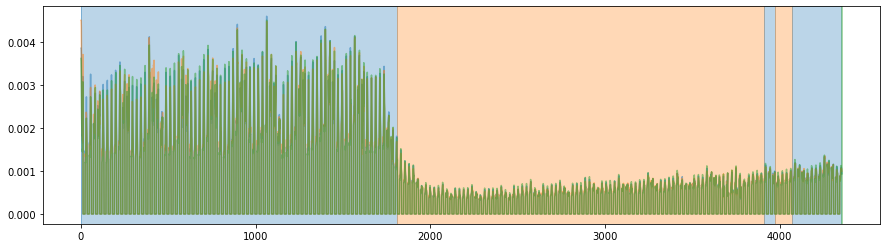

In [170]:
trimine= result[2]
C = result[2].C
path  = result[0]
plt.figure(figsize=(15,4))
plt.plot(C,alpha=0.5)
st=0
plt.axvspan(0, path[0][1],color=sns.color_palette()[0],alpha=0.3)
for i,p in enumerate(path):
    st=path[i][1]
    if i +1< len(path):
        ed = path[i+1][1]
    else:
        ed = C.shape[0]
    plt.axvspan(st, ed,color=sns.color_palette()[path[i][0]],alpha=0.3)

In [171]:
for rgm in trimine.regimes:
    plt.figure(figsize=(15,4))
    A = rgm.A
    A  = [a/a.sum() for a in A]
    A = np.array(A)
#     A = np.where(A<0.1,0.1,A)
    df = pd.DataFrame(A)
    fig = px.scatter_ternary(df, a=0, b=1, c=2)
    fig.show()
    display(df)

,0,1,2
0,3.765947e-05,1.200415e-06,0.999961
1,5.470690e-07,9.582802e-01,0.041719
2,4.944755e-07,8.138900e-07,0.999999
3,7.485185e-01,2.231765e-01,0.028305
4,8.054055e-01,1.288614e-02,0.181708
...,...,...,...
258,1.078076e-06,1.774477e-06,0.999997
259,1.658607e-06,2.730011e-06,0.999996
260,9.764512e-01,1.874085e-06,0.023547
261,9.763837e-01,8.270067e-04,0.022789


,0,1,2
0,4.029199e-05,0.000002,0.999958
1,7.646451e-07,0.960854,0.039145
2,9.320945e-07,0.000001,0.999998
3,7.468892e-01,0.222422,0.030689
4,8.162805e-01,0.011940,0.171780
...,...,...,...
258,1.381828e-06,0.000002,0.999996
259,3.396664e-06,0.000005,0.999991
260,9.769101e-01,0.000002,0.023087
261,9.763205e-01,0.000478,0.023201


,0,1,2
0,3.765947e-05,1.200415e-06,0.999961
1,5.470690e-07,9.582802e-01,0.041719
2,4.944755e-07,8.138900e-07,0.999999
3,7.485185e-01,2.231765e-01,0.028305
4,8.054055e-01,1.288614e-02,0.181708
...,...,...,...
258,1.078076e-06,1.774477e-06,0.999997
259,1.658607e-06,2.730011e-06,0.999996
260,9.764512e-01,1.874085e-06,0.023547
261,9.763837e-01,8.270067e-04,0.022789


<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [172]:
A =[]
for rgm in trimine.regimes:
    A.append(rgm.A)


In [173]:
# display(A[0])
# display(A[1])
diff = A[0]-A[2]
print(diff)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

In [122]:
for rgm in trimine.regimes:
#     plt.figure(figsize=(15,4))
    O = copy.deepcopy(rgm.O)
    O  = [o/o.sum() for o in O]
#     O = np.array(O)
#     O = np.where(O<0.1,0.1,O)
    df1 = pd.DataFrame(O)
    fig =px.scatter_ternary(df1, a=0, b=1, c=2)
    fig.show()